# Proyek KASDD Ganjil 2023/24 : Valorant Pro Matches
**Nama Kelompok**: TSTKPlusSatu

| Nama                          | NPM         | Kelas |
|-------------------------------|-------------|-------|
| Kevin Alexander               | 2106705026  | B     |
| Emir Shamsuddin Fadhlurrahman | 2106632541  | F     |
| Michael Christlambert Sinanta | 2106750414  | F     |
| Vinsen Wijaya                 | 2106637776  | F     |


**Cara Menjalankan Program:**

1. Siapkan file yang dibutuhkan dalam satu folder.
```
    Folder
    │
    └─── tk-kasdad.ipynb
    │   
    └─── games.csv
    │   
    └─── matches.csv
    │   
    └─── scores.csv
    │   
    └─── agent_encode.csv
```
* Dataset dapat diakses pada [link](https://drive.google.com/drive/folders/1Fd8342inMJjF46Df7aMlo51qEvtWfl3s) ini
2. Jalankan program dengan menekan "Run All"
3. Program dapat berhasil dijalankan.

## Install Library

In [3]:
%pip install pandas numpy seaborn scipy plotly matplotlib

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/4e/dd/4a77fb4cb7d207fbeb77dfc7c022131d295767504eabb5836fcd63b644a1/pandas-2.1.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.1.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (18 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/e8/06/0512e2582fd27bb7b358fa1e4ffc0f6c89c89f5ada31df58c5fa93171098/numpy-1.26.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.26.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (115 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/50/8b/2057417a07a6fee8ed8be40e37bac4a502cae4cf44468a02962bb

##  Import Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

## Data Preprocessing

In [118]:
df_games = pd.read_csv('./games.csv')
df_matches = pd.read_csv('./matches.csv')
df_scores = pd.read_csv('./scores.csv')
df_encode = pd.read_csv('./agent_encode.csv')

In [9]:
df_matches.head()

,No,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,0,62393,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,1,62403,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (C),7046,7047,Bjor's Kittens,Mugiwara,2,0
2,2,62391,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (A),6461,6903,Akrew,Booster Seat Gaming,2,1
3,3,62396,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (B),6164,7043,Radiance,sameROFLMAO,2,0
4,5,62402,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Elimination (C),7047,3545,Mugiwara,CLG Red,2,0


In [10]:
df_games.head()

,No,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds
0,0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,0.0,5.0,13.0,13,4.0,2.0,4.0,10.0,7
1,1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,2,3.0,3.0,5.0,4.0,2,2.0,0.0,4.0,9.0,13
2,2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,2.0,5.0,12.0,13,2.0,2.0,6.0,11.0,8
3,3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,1,2.0,2.0,4.0,11.0,13,4.0,1.0,2.0,12.0,6
4,4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,1,4.0,2.0,3.0,13.0,13,3.0,3.0,4.0,12.0,9


In [11]:
df_scores.head()

,No,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,0,60894,8419.0,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,1,60894,466.0,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,2,60894,3712.0,diaamond,Boos,sova,226.0,17.0,9.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,3,60894,5099.0,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,4,60894,3983.0,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0


In [12]:
df_encode.head()

,Unnamed: 0,Agent,Encode
0,0,jett,0
1,1,sova,1
2,2,astra,2
3,3,kayo,3
4,4,killjoy,4


In [13]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6401 entries, 0 to 6400
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   No              6401 non-null   int64 
 1   MatchID         6401 non-null   int64 
 2   Date            6401 non-null   object
 3   Patch           5990 non-null   object
 4   EventID         6401 non-null   int64 
 5   EventName       6401 non-null   object
 6   EventStage      6401 non-null   object
 7   Team1ID         6401 non-null   int64 
 8   Team2ID         6401 non-null   int64 
 9   Team1           6401 non-null   object
 10  Team2           6401 non-null   object
 11  Team1_MapScore  6401 non-null   int64 
 12  Team2_MapScore  6401 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 650.2+ KB


In [15]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12961 entries, 0 to 12960
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 12961 non-null  int64  
 1   GameID             12961 non-null  int64  
 2   MatchID            12961 non-null  int64  
 3   Map                12961 non-null  object 
 4   Team1ID            12961 non-null  int64  
 5   Team2ID            12961 non-null  int64  
 6   Team1              12961 non-null  object 
 7   Team2              12961 non-null  object 
 8   Winner             12961 non-null  int64  
 9   Team1_Eco          11927 non-null  float64
 10  Team1_SemiEco      11927 non-null  float64
 11  Team1_SemiBuy      11927 non-null  float64
 12  Team1_FullBuy      11927 non-null  float64
 13  Team1_TotalRounds  12961 non-null  int64  
 14  Team2_Eco          11927 non-null  float64
 15  Team2_SemiEco      11927 non-null  float64
 16  Team2_SemiBuy      119

In [16]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128779 entries, 0 to 128778
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   No                128779 non-null  int64  
 1   GameID            128779 non-null  int64  
 2   PlayerID          128692 non-null  float64
 3   PlayerName        128779 non-null  object 
 4   TeamAbbreviation  126763 non-null  object 
 5   Agent             124679 non-null  object 
 6   ACS               128249 non-null  float64
 7   Kills             128289 non-null  float64
 8   Deaths            128289 non-null  float64
 9   Assists           128289 non-null  float64
 10  PlusMinus         127026 non-null  float64
 11  KAST_Percent      2637 non-null    float64
 12  ADR               119904 non-null  float64
 13  HS_Percent        119307 non-null  float64
 14  FirstKills        128249 non-null  float64
 15  FirstDeaths       119314 non-null  float64
 16  FKFD_PlusMinus    11

In [14]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17 non-null     int64 
 1   Agent       17 non-null     object
 2   Encode      17 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 540.0+ bytes


In [20]:
df_matches.isnull().sum()

No                  0
MatchID             0
Date                0
Patch             411
EventID             0
EventName           0
EventStage          0
Team1ID             0
Team2ID             0
Team1               0
Team2               0
Team1_MapScore      0
Team2_MapScore      0
dtype: int64

In [19]:
df_games.isnull().sum()

No                      0
GameID                  0
MatchID                 0
Map                     0
Team1ID                 0
Team2ID                 0
Team1                   0
Team2                   0
Winner                  0
Team1_Eco            1034
Team1_SemiEco        1034
Team1_SemiBuy        1034
Team1_FullBuy        1034
Team1_TotalRounds       0
Team2_Eco            1034
Team2_SemiEco        1034
Team2_SemiBuy        1034
Team2_FullBuy        1034
Team2_TotalRounds       0
dtype: int64

In [18]:
df_scores.isnull().sum()

No                       0
GameID                   0
PlayerID                87
PlayerName               0
TeamAbbreviation      2016
Agent                 4100
ACS                    530
Kills                  490
Deaths                 490
Assists                490
PlusMinus             1753
KAST_Percent        126142
ADR                   8875
HS_Percent            9472
FirstKills             530
FirstDeaths           9465
FKFD_PlusMinus        9465
Num_2Ks              10195
Num_3Ks              10195
Num_4Ks              10195
Num_5Ks              10195
OnevOne              10195
OnevTwo              10195
OnevThree            10195
OnevFour             10195
OnevFive             10195
Econ                 10195
Plants               10195
Defuses              10195
dtype: int64

## Data Analysis

In [189]:
games_with_patch = df_games.merge(df_matches[['MatchID', 'Patch']], on='MatchID', how='left')
merged_data = df_scores.merge(games_with_patch[['GameID', 'Patch']], on='GameID', how='left')
merged_data = merged_data.dropna(subset=['Patch'])

In [190]:
merged_data['Patch_Version'] = merged_data['Patch'].str.extract(r'(\d)\.\d+').astype(float)
merged_data.head()

,No,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,...,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses,Patch,Patch_Version
0,0,60894,8419.0,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,...,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,Patch 3.12,3.0
1,1,60894,466.0,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,...,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0,Patch 3.12,3.0
2,2,60894,3712.0,diaamond,Boos,sova,226.0,17.0,9.0,8.0,...,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0,Patch 3.12,3.0
3,3,60894,5099.0,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,...,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,Patch 3.12,3.0
4,4,60894,3983.0,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,...,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,Patch 3.12,3.0


/var/folders/3g/mp1xr19x2cjf301tfv925g5c0000gn/T/ipykernel_89656/1130637063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data[merged_data['Patch_Version'] == 0.0], x='Agent', order=hue_order, legend=False, palette='magma')
/var/folders/3g/mp1xr19x2cjf301tfv925g5c0000gn/T/ipykernel_89656/1130637063.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data[merged_data['Patch_Version'] == 1.0], x='Agent', order=hue_order, legend=False, palette='magma')
/var/folders/3g/mp1xr19x2cjf301tfv925g5c0000gn/T/ipykernel_89656/1130637063.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

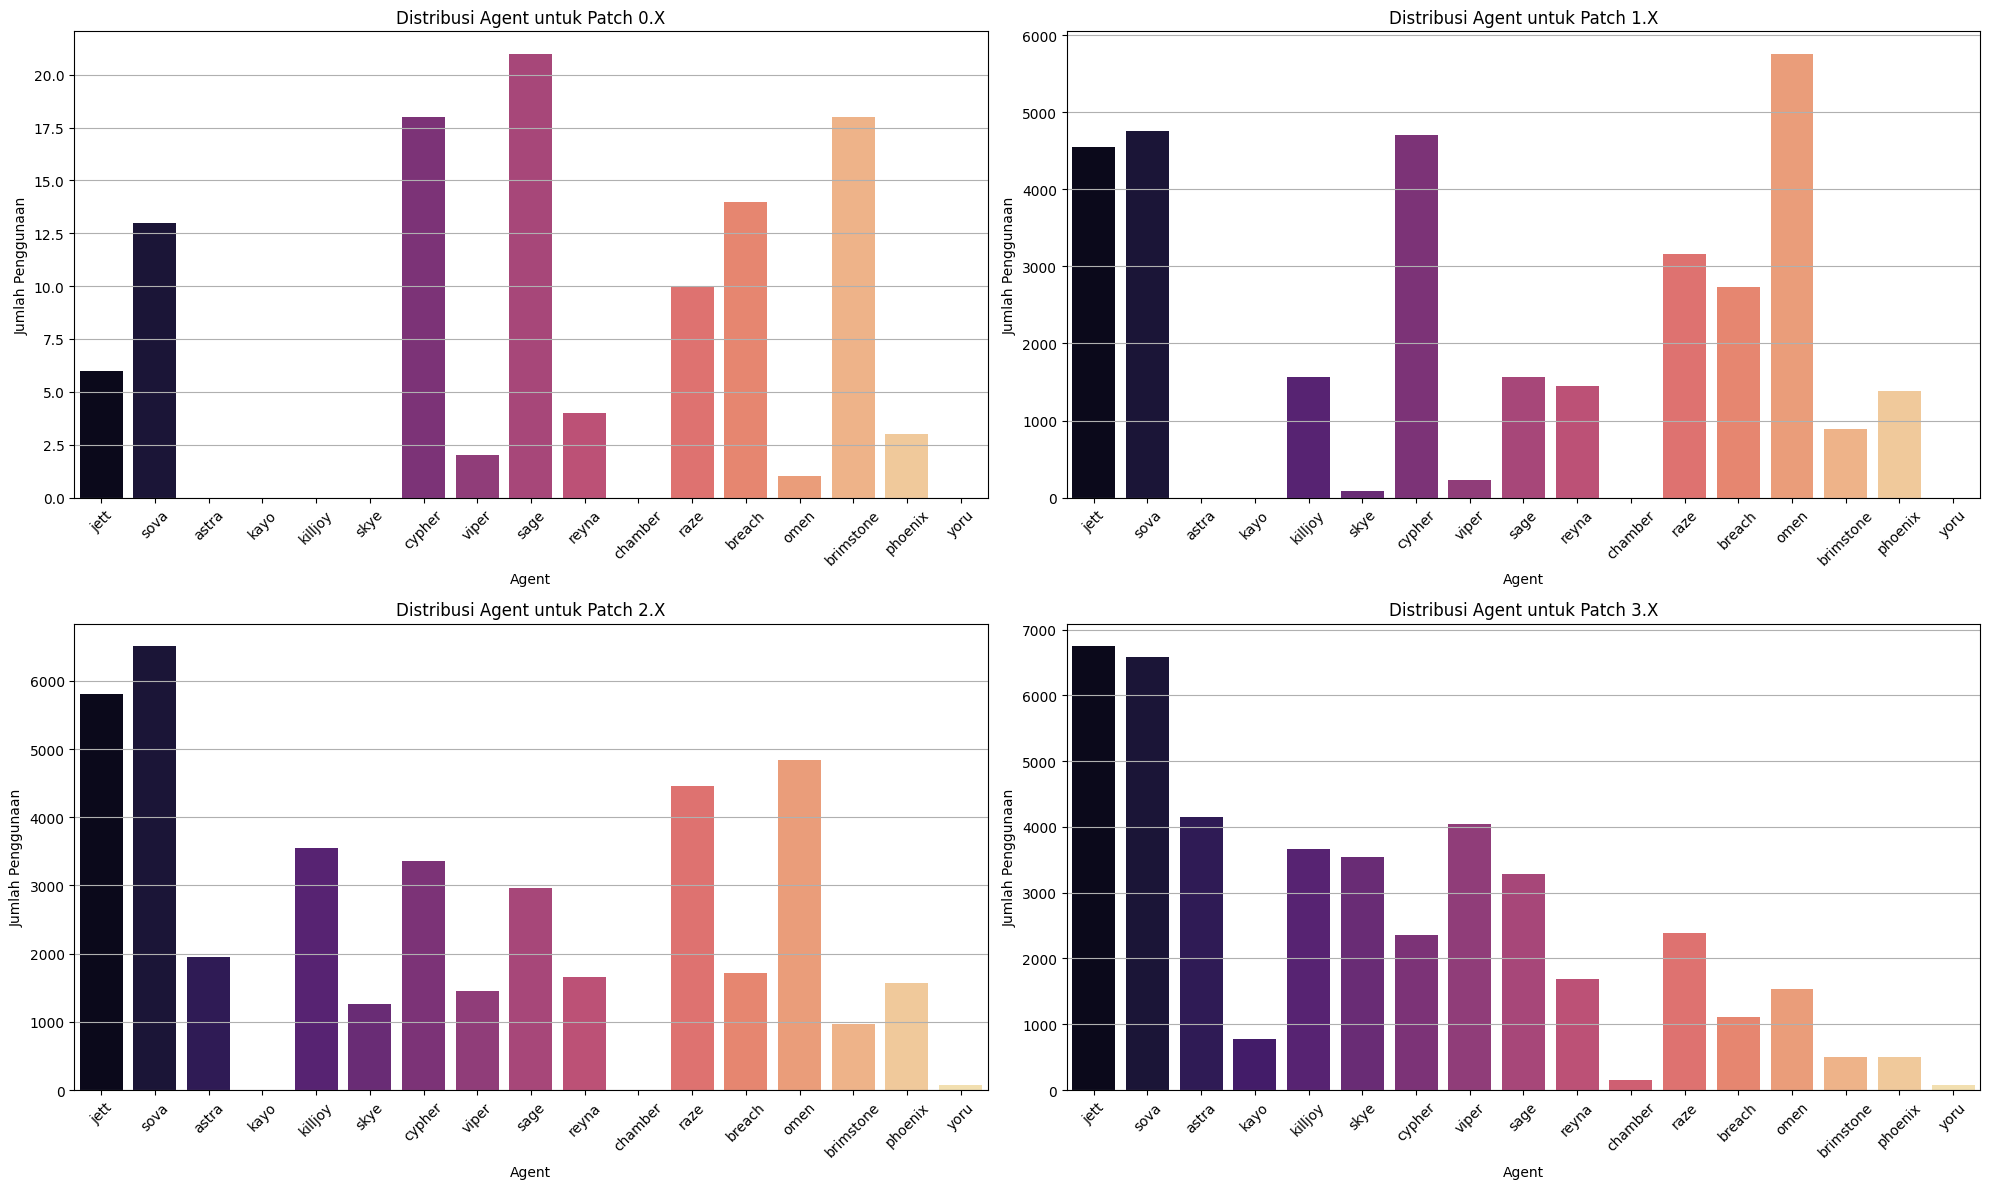

In [191]:
hue_order = df_encode['Agent']

plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.countplot(data=merged_data[merged_data['Patch_Version'] == 0.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 0.X')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.countplot(data=merged_data[merged_data['Patch_Version'] == 1.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 1.X')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(2, 2, 3)
sns.countplot(data=merged_data[merged_data['Patch_Version'] == 2.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 2.X')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(2, 2, 4)
sns.countplot(data=merged_data[merged_data['Patch_Version'] == 3.0], x='Agent', order=hue_order, legend=False, palette='magma')
plt.title('Distribusi Agent untuk Patch 3.X')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penggunaan')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

> Penjelasan : 

/var/folders/3g/mp1xr19x2cjf301tfv925g5c0000gn/T/ipykernel_89656/399355324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data[merged_data['Agent'] == agent],
/var/folders/3g/mp1xr19x2cjf301tfv925g5c0000gn/T/ipykernel_89656/399355324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data[merged_data['Agent'] == agent],
/var/folders/3g/mp1xr19x2cjf301tfv925g5c0000gn/T/ipykernel_89656/399355324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data[merged_data['Agent'] == agent],
/var/folde

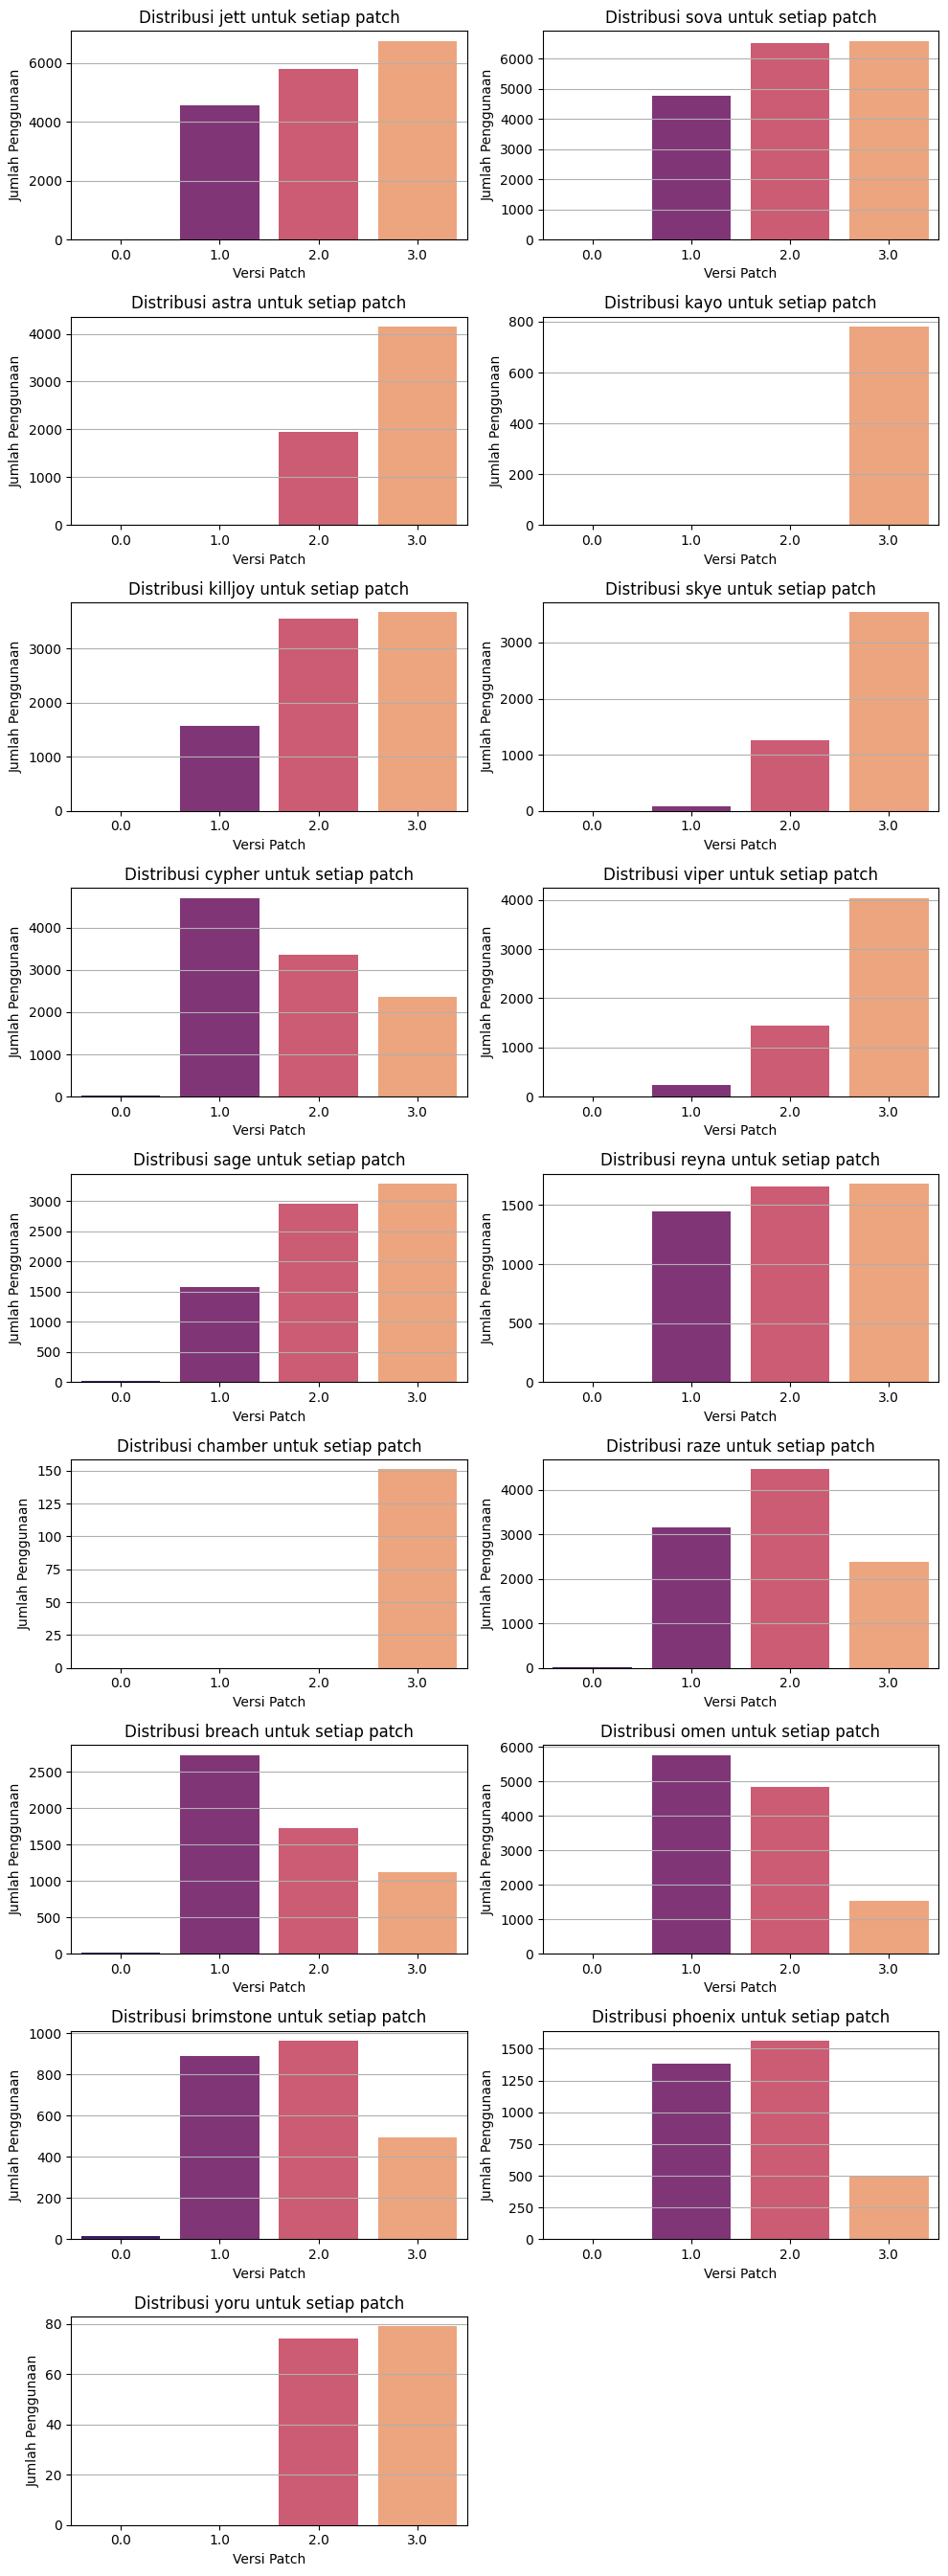

In [195]:
patch_order = merged_data['Patch_Version'].sort_values().unique()
num_agents = len(hue_order)
num_cols = 2
num_rows = (num_agents + num_cols - 1) // num_cols

plt.figure(figsize=(10, 3 * num_rows))

for i, agent in enumerate(hue_order, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=merged_data[merged_data['Agent'] == agent], 
                  x='Patch_Version', palette='magma', order=patch_order)
    plt.title(f'Distribusi {agent} untuk setiap patch')
    plt.xlabel('Versi Patch')
    plt.ylabel('Jumlah Penggunaan')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()